# Winter 2022 Data Science Intern Challenge
 

## Question 1
__Given some sample data, write a program to answer the following
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.__ 


__Importing nescessary library used for data-manipulation and analysis.__

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


__Reading the .csv file from my Google Drive__

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Shopify/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

__Initial look at the dataset__

In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


__Looking for null values__

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


__As we can see from the "describe()" function the standard deviation for order_amount is 41282.54 this means that the values are spread out over a wide-range. This can be a reason for mean not being a proper representation of the AOV.__

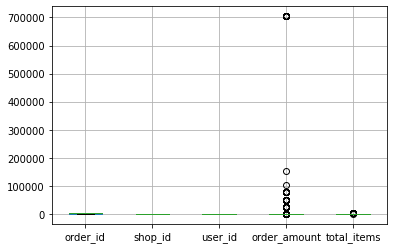

In [ ]:
df.boxplot()

__It can be seen clearly from the box-plot that there are some outliers for "order_amount". It is nescessary to look further into the higher values for "order_amount"__

In [ ]:
df.groupby('order_amount').count().tail(10)

,order_id,shop_id,user_id,total_items,payment_method,created_at
order_amount,,,,,,
1064,1,1,1,1,1,1
1086,1,1,1,1,1,1
1408,2,2,2,2,2,2
1760,1,1,1,1,1,1
25725,19,19,19,19,19,19
51450,16,16,16,16,16,16
77175,9,9,9,9,9,9
102900,1,1,1,1,1,1
154350,1,1,1,1,1,1


__There is a huge increase in the value for "order_amount" as it goes from 1760 to 25725. We can look into each of these values starting from 704000 till 25725 as these values are the reason the  value of AOV is driving up.__

In [ ]:
pd.set_option('display.max_rows', 64)
df.loc[df['order_amount'].isin([704000, 154350,102900,77175,51450, 25725])].sort_values(by='order_amount')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
2922,2923,78,740,25725,1,debit,2017-03-12 20:10:58
3151,3152,78,745,25725,1,credit_card,2017-03-18 13:13:07
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43
3440,3441,78,982,25725,1,debit,2017-03-19 19:02:54
2548,2549,78,861,25725,1,cash,2017-03-17 19:36:00
2270,2271,78,855,25725,1,credit_card,2017-03-14 23:58:22
3780,3781,78,889,25725,1,cash,2017-03-11 21:14:50
4040,4041,78,852,25725,1,cash,2017-03-02 14:31:12
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54


__Looking at the values few things can be noted.__
- These orders occure from only 2 shop_id: 42 and 78. 
- For order_amount of 704000, shop_id is 42 and user_id is 607. The transaction always takes place at the same time. It shows a big order sale.
- For the other shop_id (78), all the orders are selling in multiples of 25725. 

In [ ]:
df.median()

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64

In [ ]:

Q1 = np.percentile(df['order_amount'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['order_amount'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['order_amount'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  163.0
Q1 50 percentile of the given data is,  284.0
Q1 75 percentile of the given data is,  390.0
Interquartile range is 227.0


__Analysis__
- The first  is completly delete the outliers. 

-  I can see from the information above the **meadian of 284 is a much better metric then average** 

## Question 1 Answers:
__a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.__ 

I can see a huge deviation from AOV becauese of few outliers in the transaction data-set. Then, using mean would be problematic. 
__b) What metric would you report for this dataset?__

Median is a better . The median is less effected by outliers and skewed data. It is better than mean. 

__c) What is its value?__

The value for median/Median Order Value/MOV = $284


## Question 2
__For this question you’ll need to use SQL. Access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below__

## Question 2 Answers:

__a) How many orders were shipped by Speedy Express in total?__

    SELECT count(OrderID) from [Orders] where ShipperID in (
    SELECT ShipperID FROM [Shippers] WHERE ShipperName = "Speedy Express" )
    
   ___Answer: 54___


__b) What is the last name of the employee with the most orders?__

    SELEct LastName FROM [Employees] 
    JOIN 
    (SELECT EmployeeID , Count(EmployeeID) as count1 FROM [Orders] group by EmployeeID order by count1 DESC LIMIT 1) as Target
    ON Target.EmployeeID = Employees.EmployeeID
   ___Answer: Peacock___

__c) What product was ordered the most by customers in Germany?__

    SELECT * FROM [Products] 
    JOIN 
    (
      SELECT ProductID,SUM(Quantity) as "Total Quantity" from OrderDetails WHERE OrderID in 
      (
          SELECT OrderID FROM [Orders] WHERE CustomerID in 
              (
                  SELECT CustomerID FROM [Customers] WHERE Country = "Germany"
              )
      ) GROUP BY ProductID order by "Total Quantity" DESC LIMIT 1
    ) as abc
    ON abc.ProductID = Products.ProductID
___Answer: Boston Crab Meat (Total Quantity: 160)___

